# Proyecto: Implementación del concepto de ''caja''

$\textbf{Descripción}$: En este proyecto se busca implementar el concepto de "caja", 
el cual se refiere al producto carteriano de n intervalos.
Además, se pretende extender el concepto a n-dimensiones

Por otro lado, se pretende que esta estructura sea lo suficientmente
adecuada para poderla utilizar en alguna aplcación, por ejemplo, en 
la busqueda de ceros de sistemas de ecuaciones.

## Introducción

Un n-dimensional vector de intervalos: Este se refiere a un vector cuyos 
elementos son intervalos. En el caso de un vector de intervalos 2-Dimensional
se tiene algo como X=(Intervalo(x1,X1),Intervalo(x2,X2)).

Luego, este vector de intervalos (2-dimensional) se puede visualizar en el plano 
cartesiano como el rectangulo que contine el conjunto de puntos que cumplen que
x1<x<X1 y x2<y<X2. Vemos que esto corresponde justamente al producto cartesiano 
de los intervalos dentro del vector de intervalos y más aún, si pensamos en un 
vector de intervalos 3-dimensional podemos ver que lo que se representa en el plano
cartesiano es el conjunto de puntos contenidos en una "caja".


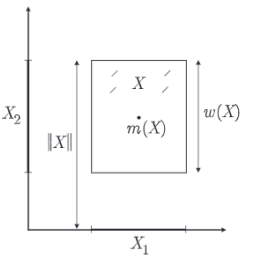

## Propiedades

1. Si x=(x1,x2,...,xn) es un conjunto de valores reales y X=(X1,...Xn) es n vector de
intervalos, entonces decimos que x está contenido en X si xi pertenece a Xi para i=1,..,n.

$x \in X ~si~ x_i \in X_i ~para~ i=1,\cdots,n$

2. La intersección de dos vectores de intervalos es vacía si cualqueira de las 
intersecciones Xi ∩ Yi, i=1,..n, es vacía. Dr otra forma se tiene que la intersección
entre los vectores de intervalos corresponde al vector de intervalos cuyas entradas
son Xi ∩ Yi, i=1,..n.

$X_i \cap Y_i=(X_1 \cap Y_1,X_2 \cap Y_2,\cdots,X_n \cap Y_n)$

3. Si X=(X1,...Xn) y Y=(Y1,...Yn) son vectores de interavalos entonces se dice que X 
está contenido en Y si Xi está contenido en Yi, i=1,..,n.

$X \subset Y~ si~  X_i \subset Y_i~ para~ i=1,\cdots,n$

4. El ancho de un vector de intervalos X=(X1,...Xn) se define como el ancho
más grande de sus componentes.

$diam(X)=max(diam(X_i)), ~i=1,\cdots, n$

5. El punto medio de un vector de intervalos X=(X1,...Xn) se define como el vector
cuyas entradas son los puntos medios de cada Xi.

$mid(X)=(mid(X1),mid(X2),...,mid(X3))$

6. La norma de un vector de intervalos X=(X1,...Xn) se define como el máximo de los valores
absolutos de las componentes de cada intervalo.

$||X||=max(max(abs(X_i))), ~i=1,...,n$

##  Funciones a implementar

Por cada una de las propiedades habrá que implementar una función.

In [1]:
include("intervalos.jl")

esmonotona (generic function with 1 method)

 ### Estructura

In [2]:
#Definimos una estructura para un vector de intervalos

struct V_Intervalos{T} 
    intervalos::T
    function V_Intervalos(a::Intervalo{S}) where {S<:Real}
        
        new{typeof(a)}(a)
    end
end

In [3]:
#Como el vector de intervalos puede ser n-dimensional entonces lo creamos con argumentos variables
V_Intervalos(a::Intervalo,b::Intervalo...)= (a,b...)

V_Intervalos

### Propiedad 1:

In [5]:
import Base: ∈

In [6]:
function ∈(a::Tuple, b::Tuple)
    length(a)!=length(b) && error("Dimensiones distintas")
    bol=true
    num=1
   while bol && num ≤ length(a)
        if a[num] ∈ b[num]
        else
            bol=!bol
        end
        num+=1
   end
    return bol
end

in (generic function with 38 methods)

In [8]:
(-1,0.5,3) ∈ V_Intervalos(a,b,Intervalo(1,3)) 

false

In [9]:
(1,0.5,3,4) ∈ V_Intervalos(a,b,c,d) 

true

In [62]:
a=Intervalo(1,2)
b=Intervalo(big(0.1),1)
c=Intervalo(1,3)
d=Intervalo(3,9)

Intervalo{Float64}(3.0, 9.0)

### Propiedad 2

In [10]:
import Base: ∩

In [11]:
function ∈(a::Intervalo,b::Tuple)
    num=1
    while num ≤ length(b)
        if a==b[num]
            return true
            break
        end
        num+=1
    end
    return false
end
        

in (generic function with 39 methods)

In [12]:
a ∈ V_Intervalos(b,c,d) 

false

In [13]:
intervalo_vacio(b) ∈ V_Intervalos(intervalo_vacio(Real),b,c,d)

true

In [14]:
function ∩(a::Tuple, b::Tuple)
    length(a)!=length(b) && error("Dimensiones distintas")
    if intervalo_vacio(Real) ∈ a || intervalo_vacio(Real) ∈ b
        return intervalo_vacio(Real)
    end
    num=1
    intersecciones=[]
    while num ≤ length(b)
        inter=a[num] ∩ b[num]
        if inter == intervalo_vacio(Real)
            return intervalo_vacio(Real)
            break
        end
        append!(intersecciones,inter)
        num+=1
    end
    return V_Intervalos.(intersecciones...)
end

intersect (generic function with 24 methods)

In [15]:
V_Intervalos(a,b,c,d) ∩ V_Intervalos(intervalo_vacio(Real),b,c,d)

Intervalo{Float64}(NaN, NaN)

In [16]:
V_Intervalos(a,b,c,d) ∩ V_Intervalos(a,b,c,d)

(Intervalo{Float64}(1.0, 2.0), Intervalo{BigFloat}(0.1000000000000000055511151231257827021181583404541015625, 1.0), Intervalo{Float64}(1.0, 3.0), Intervalo{Float64}(3.0, 9.0))

In [17]:
V_Intervalos(a,b,c,d) ∩ V_Intervalos(d,c,b,a)

Intervalo{Float64}(NaN, NaN)

### Propiedad 3

In [18]:
import Base: ⊆

In [21]:
function ⊆(a::Tuple,b::Tuple)
    length(a)!=length(b) && error("Dimensiones distintas")
    num=1
    bol=true
    while bol && num ≤ length(b)
        if a[num] ⊆ b[num]
        else
            bol=false
            break
        end
        num+=1
    end
    return bol
end

issubset (generic function with 6 methods)

In [23]:
V_Intervalos(Intervalo(-1,1),b,c,d) ⊆ V_Intervalos(a,b,c,d)

false

In [24]:
V_Intervalos(Intervalo(-1,1),b,c,d) ⊆ V_Intervalos(Intervalo(-2,5),b,c,d)

true

### Propiedad 4

In [52]:
A=V_Intervalos(Intervalo(-2,5),b,c,d)

(Intervalo{Float64}(-2.0, 5.0), Intervalo{BigFloat}(0.1000000000000000055511151231257827021181583404541015625, 1.0), Intervalo{Float64}(1.0, 3.0), Intervalo{Float64}(3.0, 9.0))

In [26]:
function diam(a::Intervalo)
    return a.supremo-a.infimo
end

diam (generic function with 1 method)

In [33]:
function Diam(a::Tuple)
    diametros=[]
    for i in range(1,length(a))
        append!(diametros,diam(a[i]))
    end
    return maximum(diametros)
end

Diam (generic function with 1 method)

In [39]:
Diam(A)

7.0

### Propiedad 5

In [64]:
function mid(a::Intervalo)
    return (a.supremo+a.infimo)/2
end

mid (generic function with 1 method)

In [69]:
function Mid(a::Tuple)
    medios=[]
    for i in range(1,length(a))
#         print(mid(a[i]))
        append!(medios,mid(a[i]))
    end
    return medios
end

Mid (generic function with 1 method)

In [66]:
Mid(A)

1.50.550000000000000002775557561562891351059079170227050781252.06.0

4-element Vector{Any}:
 1.5
 0.55000000000000000277555756156289135105907917022705078125
 2.0
 6.0

### Propiedad 6

In [ ]:
function norma(a::Tuple)
    maximos=[]
    for i in range(1,length(a))
        